In [ ]:
!pip install fastbook

In [8]:
import fastbook
from fastbook import *
fastbook.setup_book()

In [3]:
from fastai.vision.all import *

In [9]:
key = os.environ.get('AZURE_SEARCH_KEY', '6a26fbdf88844367933e9181f02cafdd')

In [10]:
country = 'India','China','UK',"USA",'Japan','Germany','Russia','SriLanka','Argentina'
path = Path('dataset')

In [11]:
if not path.exists():
    path.mkdir()
    for o in country:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} flag')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [12]:
fns = get_image_files(path)
fns

(#1209) [Path('dataset/India/00000108.jpg'),Path('dataset/India/00000140.png'),Path('dataset/India/00000093.png'),Path('dataset/India/00000066.jpg'),Path('dataset/India/00000099.jpg'),Path('dataset/India/00000058.jpg'),Path('dataset/India/00000018.jpg'),Path('dataset/India/00000125.jpg'),Path('dataset/India/00000105.gif'),Path('dataset/India/00000100.jpg')...]

In [13]:
failed = verify_images(fns)
failed

(#12) [Path('dataset/India/00000149.jpg'),Path('dataset/Russia/00000064.png'),Path('dataset/Russia/00000034.svg'),Path('dataset/Russia/00000015.jpg'),Path('dataset/Russia/00000079.jpg'),Path('dataset/China/00000104.png'),Path('dataset/Argentina/00000114.svg'),Path('dataset/SriLanka/00000139.png'),Path('dataset/SriLanka/00000087.png'),Path('dataset/SriLanka/00000057.svg')...]

In [14]:
failed.map(Path.unlink);

In [16]:
flags = DataBlock(
    blocks = (ImageBlock,CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(seed=42,valid_pct=0.2),
    get_y = parent_label,
    item_tfms = Resize(128)
);

In [17]:
dls = flags.dataloaders(path)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


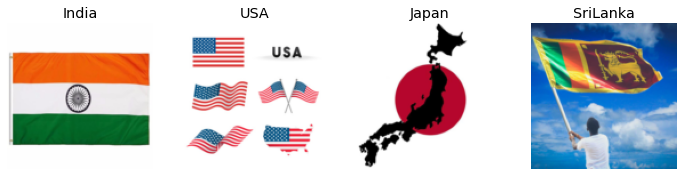

In [18]:
dls.valid.show_batch(max_n=4, nrows=1)

In [19]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time
0,2.410579,1.021777,0.255230,01:25


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch,train_loss,valid_loss,error_rate,time
0,0.819153,0.592680,0.154812,01:43
1,0.560018,0.484106,0.100418,01:43
2,0.389462,0.439152,0.079498,01:42
3,0.293212,0.433424,0.075314,01:44


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency e

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


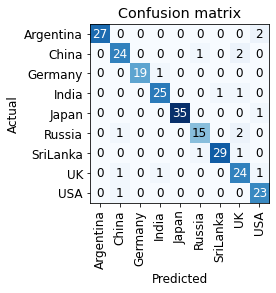

In [20]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

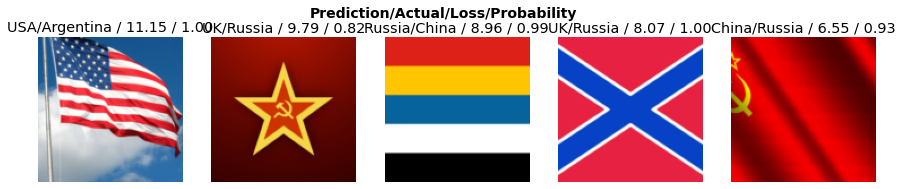

In [21]:
interp.plot_top_losses(5, nrows=1)


In [22]:
learn.predict('../content/flagtest1.jpg')

('SriLanka',
 tensor(6),
 tensor([0.0499, 0.2157, 0.0916, 0.0632, 0.0164, 0.1976, 0.3083, 0.0558, 0.0017]))

In [23]:
learn.predict('../content/flagtest2.jpg')

('USA',
 tensor(8),
 tensor([9.7032e-06, 1.1631e-04, 2.2291e-03, 1.4405e-04, 3.0599e-02, 1.2862e-03, 1.4220e-04, 6.5227e-02, 9.0025e-01]))

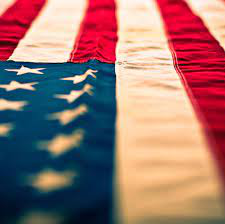

In [24]:
Image.open('../content/flagtest2.jpg')

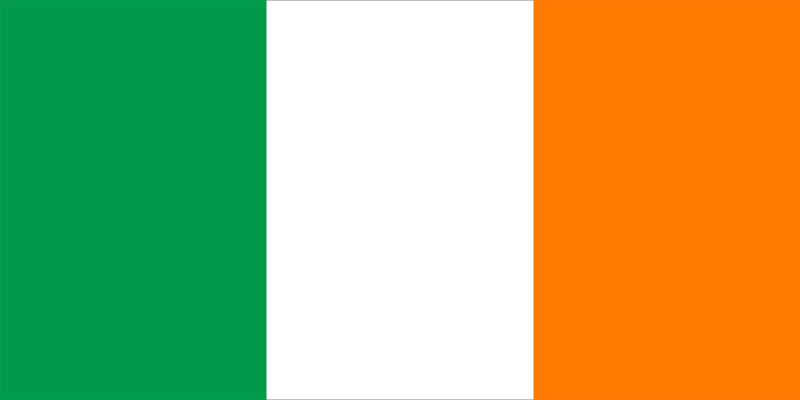

In [25]:
Image.open('../content/flagtest1.jpg')